# Introduction





## About the Data and Challenges Within

In this case there is a large, publicly available dataset that has inherent flaws. However better data is either not available or hard to source. These ratings make headlines in the sports world and its common for players who feel they've been underrated to tweet at the company so this is definitely information that holds value we just need to proceed with caution.


[Per this ESPN story](https://www.espn.com/soccer/blog/espn-fc-united/68/post/2959703/fifa-17-player-ratings-system-blends-advanced-stats-and-subjective-scouting) the data is collected from multiple sources but relies heavily on 9000 survey respondents most of whom are season ticket holders watching games in person.

The physical attribute scores are the least biased. Other stats such as overall, potential, and position scores are manually adjusted, or structurally limited before the game is published.


Therefore I will cluster the data using only the physical attribute the scores but retain the other data for comparison and analysis of any clusters discovered. Here their structural bias wont affect the clustering but the information those data contain may enable deeper understanding of the clusters. 

### Import libraries and define functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sqlalchemy import create_engine

In [3]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
def print_nulls(df):
    out = pd.Series({'Column': 'Percentage of nulls', '-----' : '-----'}
                   ).append(df.isnull().sum()*100/df.isnull().isnull().count())
   
    return print_full(out)

In [4]:
def plot_hist_boxplot(df):
    '''
    Accepts only numerical columns;
    use a maks.
    '''
    dim = df.shape[1]
    plt.figure(figsize=(20, dim*5))
    
    # iterate through the columns
    for i, column in enumerate(df.columns):
        
        # plot a histogram
        plt.subplot(dim, 2, (i+1)*2-1)
        plt.hist(df[column])
        plt.ylabel(column, size='xx-large')
        
        # plot a boxplot
        plt.subplot(dim, 2, (i+1)*2)
        plt.boxplot(df[column], whis=[2.5, 97.5]) # boxplot will show outliers beyond the inner 90th percentile
    plt.show()

### Load the Dataset

In [5]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'fifa19'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
    
query1='''
SELECT
    *
FROM
    fifa19
'''
    
    
df = pd.read_sql_query(query1, con=engine)
engine.dispose()

In [6]:
# Make column names lowercase for ease and consistency
df.columns = df.columns.str.lower()

In [7]:
df.head()

,id,name,age,photo,nationality,flag,overall,potential,club,club logo,...,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
df.shape

(18207, 88)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18207 non-null  int64  
 1   name                      18207 non-null  object 
 2   age                       18207 non-null  int64  
 3   photo                     18207 non-null  object 
 4   nationality               18207 non-null  object 
 5   flag                      18207 non-null  object 
 6   overall                   18207 non-null  int64  
 7   potential                 18207 non-null  int64  
 8   club                      17966 non-null  object 
 9   club logo                 18207 non-null  object 
 10  value                     18207 non-null  object 
 11  wage                      18207 non-null  object 
 12  special                   18207 non-null  int64  
 13  preferred foot            18159 non-null  object 
 14  intern

In [10]:
# Drop some unique identifiers, and links to images etc.

df.drop(['photo', 'flag', 'club logo', 'special', 'loaned from'
         , 'real face', 'jersey number', 'contract valid until'], axis=1, inplace=True)

In [11]:
print_nulls(df)

Column                      Percentage of nulls
-----                                     -----
id                                            0
name                                          0
age                                           0
nationality                                   0
overall                                       0
potential                                     0
club                                    1.32367
value                                         0
wage                                          0
preferred foot                         0.263635
international reputation               0.263635
weak foot                              0.263635
skill moves                            0.263635
work rate                              0.263635
body type                              0.263635
position                               0.329544
joined                                  8.52969
height                                 0.263635
weight                                 0

In [12]:
# Define a function to apply derived functions for this dataset


def clean(df):
    
    # Fill missing values where possible
    '''
    The consistent 11.5% null rate in these columns is due to all keepers having null values. Filling
    with 0 is the easiest solution.
    '''
    cols = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
           'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
           'lcb', 'cb', 'rcb', 'rb']

    df.loc[:, cols] = df.loc[:, cols].fillna(0)
    
    # Fill club with no club for unsigned players
    df.loc[:, 'club'] = df.loc[:, 'club'].fillna('unsigned')
    
    '''
    Most players without a release clause also appear not to have a contract at all
    regardless, replacing with 0 suites our purposes for now.
    '''
    
    df['release clause'] = df['release clause'].fillna(0)
    
   
    # Drop the small portion of remaining nulls
    df = df.dropna().copy() 
    
    # Values for wage and value need to be converted from strings to numerical 

    df['wage'] = df['wage'].apply(lambda x: int(str(x).replace('€', '').replace('K', '')
                                               ) * 1000 if 'K' in str(x) else x)

    df['wage'] = df['wage'].apply(lambda x: int(str(x).replace('€', '').replace('M', '')
                                               ) * 1000000 if 'M' in str(x) else x)

    df['wage'] = df['wage'].apply(lambda x: 0 if str(x) == '€0' else x)



    df['value'] = df['value'].apply(lambda x: float(str(x).replace('€', '').replace('K', '')
                                               ) * 1000 if 'K' in str(x) else x)

    df['value'] = df['value'].apply(lambda x: float(str(x).replace('€', '').replace('M', '')
                                               ) * 1000000 if 'M' in str(x) else x)

    df['value'] = df['value'].apply(lambda x: 0 if str(x) == '€0' else x)
    
    
    
    df['release clause'] = df['release clause'].apply(lambda x: float(str(x).replace('€', '').replace('K', '')
                                               ) * 1000 if 'K' in str(x) else x)

    df['release clause'] = df['release clause'].apply(lambda x: float(str(x).replace('€', '').replace('M', '')
                                               ) * 1000000 if 'M' in str(x) else x)

    df['release clause'] = df['release clause'].apply(lambda x: 0 if str(x) == '€0' else x)
    
    
    # Convert height to int
    df['height'] = df['height'].apply(lambda x : str(x).split('\''))

    df['height'] = df['height'].apply(lambda x : (int(x[0]) * 12) + int(x[1]))
    
    
    # Convert weight to int
    df['weight'] = df['weight'].apply(lambda x : int(str(x).strip('lbs')))
    
    
    # Encode perferred foot as numerical
    df['right preferred'] = df['preferred foot'].apply(lambda x : 1 if str(x) == 'Right'
                                                  else 0)
    df.drop('preferred foot', axis=1, inplace=True)
    
    
    # For the fielders their position scores need to be cleaned and typed properly
    '''
    These position scores lead to some unstable solutions. In this pass they are eliminated
    
    
    '''
    for col in ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb']:
    
        if col in df.columns:

            df[col] = df[col].apply(lambda x: sum([int(i) for i in str(x).split('+')]))
        
    '''
    Work rate is highliy subjective and will be used only for analysis not clustering
    
    '''
    
    # Seperate and encode the workrate values as ordinal
    df['defense work rate'] = df['work rate'].apply(lambda x: 3 if (str(x).split('/ '))[1] == 'High' else
                                              (2 if (str(x).split('/ '))[1] == 'Medium' else 1))

    df['offense work rate'] = df['work rate'].apply(lambda x: 3 if (str(x).split('/ '))[0] == 'High' else
                                                   (2 if (str(x).split('/ '))[0] == 'Medium' else 1))
    
    df.drop('work rate', axis=1, inplace=True)
    
    
    # Log transform skewed salary
    '''
    Release clause value and wage all are heavily skewed left. Release clause and value are benefit
    greatly from a log normal transformation and become roughly normal.
    
    Wage does not normalize as easiliy. For this pass I will drop it because is strongly correlated with 
    value (.85) so most of that infromation will be retained.
    
    '''
    
    df['release clause'] = df['release clause'].apply(lambda x: np.log(x) if x !=0 else np.log(x+1))
    
    df['value'] = df['value'].apply(lambda x: np.log(x) if x !=0 else np.log(x+1))
    
    df['wage'] = df['wage'].apply(lambda x: np.log(x) if x !=0 else np.log(x+1))
    
    


    
    
    # Drop some categorical variables
    
    '''
    These values are retained in this iteration for analysis after the subset of columns are clustered.
    
    '''

    #df.drop('position', axis=1, inplace=True)

    #df.drop('body type', axis=1, inplace=True)

    #df.drop('club', axis=1, inplace=True)

    #df.drop('nationality', axis=1, inplace=True)
    
    #df.drop('joined', axis=1, inplace=True)

    return df

In [13]:
df = clean(df)

In [14]:
# Reset the index
df.reset_index(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16654 entries, 0 to 16653
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     16654 non-null  int64  
 1   id                        16654 non-null  int64  
 2   name                      16654 non-null  object 
 3   age                       16654 non-null  int64  
 4   nationality               16654 non-null  object 
 5   overall                   16654 non-null  int64  
 6   potential                 16654 non-null  int64  
 7   club                      16654 non-null  object 
 8   value                     16654 non-null  float64
 9   wage                      16654 non-null  float64
 10  international reputation  16654 non-null  float64
 11  weak foot                 16654 non-null  float64
 12  skill moves               16654 non-null  float64
 13  body type                 16654 non-null  object 
 14  positi

In [17]:
clustering_columns = ['age', 'height', 'weight', 'crossing', 'finishing', 'headingaccuracy',
       'shortpassing', 'volleys', 'dribbling', 'curve', 'fkaccuracy',
       'longpassing', 'ballcontrol', 'acceleration', 'sprintspeed', 'agility',
       'reactions', 'balance', 'shotpower', 'jumping', 'stamina', 'strength',
       'longshots', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'marking', 'standingtackle', 'slidingtackle',
       'gkdiving', 'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes'
                      ,'right preferred']

In [18]:
fielders = df[df['position'] != 'GK'].loc[:, clustering_columns]
keepers = df[df['position'] == 'GK'].loc[:, clustering_columns]
unified = df.loc[:, clustering_columns]

In [19]:
# Check the index
fielders.index

Int64Index([    0,     1,     2,     4,     5,     6,     7,     8,    10,
               11,
            ...
            16643, 16644, 16646, 16647, 16648, 16649, 16650, 16651, 16652,
            16653],
           dtype='int64', length=14751)

In [20]:
unified.index

RangeIndex(start=0, stop=16654, step=1)

In [21]:
# Write the dataframes to file 

fielders.to_csv('fielders_cleaned.csv', index_label='index')

keepers.to_csv('keepers_cleaned.csv', index_label='index')

unified.to_csv('unified_cleaned.csv', index_label='index')

df.to_csv('reference_cleaned.csv', index_label='index')

In [22]:
df.head()

,index,id,name,age,nationality,overall,potential,club,value,wage,...,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause,right preferred,defense work rate,offense work rate
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,18.520526,13.244581,...,26.0,6.0,11.0,15.0,14.0,8.0,19.238256,0,2,2
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,18.159316,12.911642,...,23.0,7.0,11.0,15.0,14.0,11.0,18.660485,1,1,3
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,18.590424,12.577636,...,33.0,9.0,9.0,15.0,15.0,11.0,19.245295,1,2,3
3,3,193080,De Gea,27,Spain,91,93,Manchester United,18.092177,12.468437,...,13.0,90.0,85.0,87.0,88.0,94.0,18.747103,1,2,2
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,18.440483,12.779873,...,51.0,15.0,13.0,5.0,10.0,13.0,19.095664,1,3,3


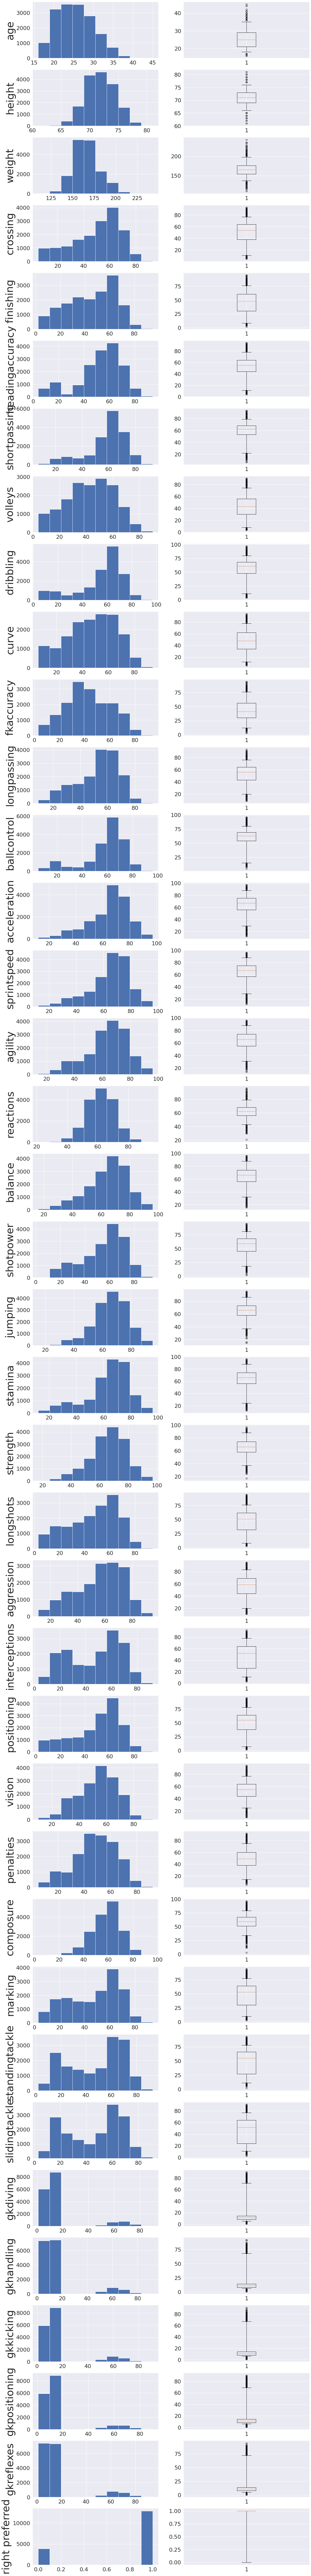

In [32]:
plot_hist_boxplot(unified)